In [1]:
#설정
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
#그래디언트 소실, 폭주 문제
def logit(z):
    return 1 / (1 + np.exp(-z))

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


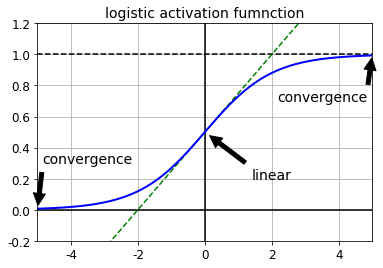

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('convergence', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('convergence',xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("logistic activation fumnction", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
#xavier & he 초기화
import tensorflow as tf

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [6]:
he_init = tf.variance_scaling_initializer() #he 초기화 이용
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, #tf.layers.dense는 기본적으로 xavier초기화를 이용한다.
                          kernel_initializer=he_init, name="hidden1")

In [7]:
#수렴하지 않는 활성화 함수(죽은 ReLu문제 해결)
#Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


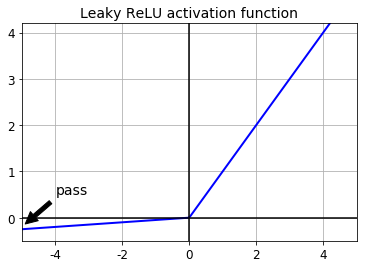

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('pass', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
#텐서플로에서 Leaky ReLU 구현하기
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [10]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01 * z, z, name=name)

hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1") #leaky_relu를 활성함수로 이용하는 은닉층 정의

In [11]:
#relu를 이용하여 신경망 훈련시키기
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [12]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [13]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [14]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [15]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [16]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [17]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [18]:
#데이터 로드하기
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [19]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [20]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.86 검증 세트 정확도: 0.9018
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9474
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.964
15 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.971
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9738
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9772
30 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9784
35 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9784


In [21]:
#ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


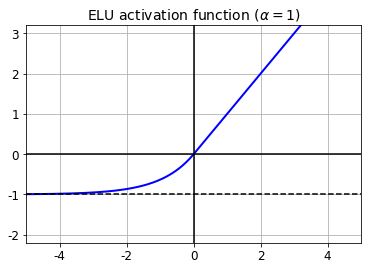

In [22]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [23]:
#tensorflow에서 구현
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [24]:
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")

In [25]:
#SELU(성능이 가장 좋음)
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)
''''
이 활성화 함수는 Günter Klambauer, Thomas Unterthiner, Andreas Mayr가 2017년에 쓴 논문에서 소개되었습니다
(나중에 책에 추가하겠습니다). 훈련할 때 SELU 활성화 함수를 사용한 완전 연결 신경망은 스스로 정규화를 합니다.
각 층의 출력은 훈련하는 동안 같은 평균과 분산을 유지하려는 경향이 있어 그래디언트 소실과 폭주 문제를 해결합니다. 
이 활성화 함수는 심층 신경망에서 다른 활성화 함수보다 뛰어난 성능을 내므로 꼭 이 함수를 시도해봐야 합니다.
''''

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


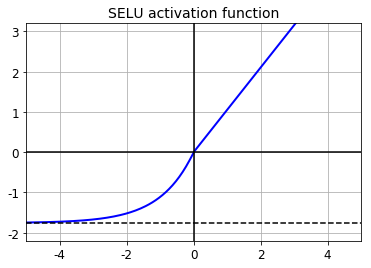

In [26]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()
''''
기본적으로 SELU 하이퍼파라미터(scale과 alpha)는 평균이 0, 표준 편차가 1에 가깝게 유지되도록 조정합니다
(입력도 평균이 0, 표준 편차가 1로 표준화되었다고 가정합니다). 
활성화 함수를 사용하면 100층으로 된 심층 신경망도 그래디언트 소실/폭주 문제없이 모든 층에서 대략 평균이 0이고 표준 편차가 1을 유지합니다:
''''

In [27]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print("층 {}: {:.2f} < 평균 < {:.2f}, {:.2f} < 표준 편차 < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max())) #다층 신경망에서도 표준편차와 평균을 유지해 그래디언트 소실과 폭주를 잡아줌

층 0: -0.26 < 평균 < 0.27, 0.74 < 표준 편차 < 1.27
층 10: -0.24 < 평균 < 0.27, 0.74 < 표준 편차 < 1.27
층 20: -0.17 < 평균 < 0.18, 0.74 < 표준 편차 < 1.24
층 30: -0.27 < 평균 < 0.24, 0.78 < 표준 편차 < 1.20
층 40: -0.38 < 평균 < 0.39, 0.74 < 표준 편차 < 1.25
층 50: -0.27 < 평균 < 0.31, 0.73 < 표준 편차 < 1.27
층 60: -0.26 < 평균 < 0.43, 0.74 < 표준 편차 < 1.35
층 70: -0.19 < 평균 < 0.21, 0.75 < 표준 편차 < 1.21
층 80: -0.18 < 평균 < 0.16, 0.72 < 표준 편차 < 1.19
층 90: -0.19 < 평균 < 0.16, 0.75 < 표준 편차 < 1.20


In [28]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [29]:
#SELU를 이용한 MNIST 분류
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [30]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

In [ ]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 40
batch_size = 50

In [ ]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True) + 1e-10
X_val_scaled = (X_valid - means) / stds

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch_scaled = (X_batch - means) / stds #스케일 조정을 해줘야함
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_val_scaled, y: y_valid})
            print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final_selu.ckpt")

In [28]:
#배치 정규화
reset_graph()

import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = tf.layers.batch_normalization(logits_before_bn, training=training,
                                       momentum=0.9)

In [33]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
training = tf.placeholder_with_default(False, shape=(), name='training')

In [ ]:
#반복을 줄이기 위한 python의 partial 함수
from functools import partial

my_batch_norm_layer = partial(tf.layers.batch_normalization,
                              training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = my_batch_norm_layer(logits_before_bn)

In [35]:
#각 층에 ELU 활성화 함수와 배치 정규화를 사용하여 MNIST를 위한 신경망을 만듦
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [36]:
#배치 정규화를 위해 별도의 업데이트 연산을 실행
n_epochs = 20
batch_size = 200

In [37]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run([training_op, extra_update_ops], #이동 평균 갱신을 위한 연산 실행
                     feed_dict={training: True, X: X_batch, y: y_batch}) #training을 True로 지정
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.9096
1 검증 세트 정확도: 0.9308
2 검증 세트 정확도: 0.942
3 검증 세트 정확도: 0.9524
4 검증 세트 정확도: 0.9566
5 검증 세트 정확도: 0.9612
6 검증 세트 정확도: 0.9622
7 검증 세트 정확도: 0.9648
8 검증 세트 정확도: 0.965
9 검증 세트 정확도: 0.9682
10 검증 세트 정확도: 0.9676
11 검증 세트 정확도: 0.969
12 검증 세트 정확도: 0.9698
13 검증 세트 정확도: 0.9698
14 검증 세트 정확도: 0.9726
15 검증 세트 정확도: 0.9726
16 검증 세트 정확도: 0.9734
17 검증 세트 정확도: 0.9738
18 검증 세트 정확도: 0.9752
19 검증 세트 정확도: 0.9756


In [38]:
#경사하강법 연산에 업데이트 연산 추가하기
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(extra_update_ops):
        training_op = optimizer.minimize(loss)

In [40]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={training: True, X: X_batch, y: y_batch}) #training을 True로 지정
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.9096
1 검증 세트 정확도: 0.9286
2 검증 세트 정확도: 0.9424
3 검증 세트 정확도: 0.9518
4 검증 세트 정확도: 0.9574
5 검증 세트 정확도: 0.9602
6 검증 세트 정확도: 0.9624
7 검증 세트 정확도: 0.9646
8 검증 세트 정확도: 0.9642
9 검증 세트 정확도: 0.9664
10 검증 세트 정확도: 0.9676
11 검증 세트 정확도: 0.9692
12 검증 세트 정확도: 0.9706
13 검증 세트 정확도: 0.9702
14 검증 세트 정확도: 0.971
15 검증 세트 정확도: 0.9738
16 검증 세트 정확도: 0.9744
17 검증 세트 정확도: 0.9744
18 검증 세트 정확도: 0.9768
19 검증 세트 정확도: 0.9764


In [41]:
#훈련에 따라 업데이트 되는 변수
[v.name for v in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0']

In [42]:
#전체 변수
[v.name for v in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']

In [43]:
#그래디언트 클리핑(그래디언트 폭주 문제 해결을 위해 일정 임계값을 넘어가지 못하게 그래디언트를 절단)
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [44]:
learning_rate = 0.01

In [45]:
#그래디언트 클리핑 적용
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss) #그래디언트 계산
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var) #그래디언트 클리핑
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs) #그래디언트 적용

In [46]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [47]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [48]:
n_epochs = 20
batch_size = 200

In [49]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.5088
1 검증 세트 정확도: 0.8334
2 검증 세트 정확도: 0.8888
3 검증 세트 정확도: 0.9094
4 검증 세트 정확도: 0.9194
5 검증 세트 정확도: 0.9224
6 검증 세트 정확도: 0.9326
7 검증 세트 정확도: 0.9388
8 검증 세트 정확도: 0.94
9 검증 세트 정확도: 0.9444
10 검증 세트 정확도: 0.9484
11 검증 세트 정확도: 0.9486
12 검증 세트 정확도: 0.9512
13 검증 세트 정확도: 0.956
14 검증 세트 정확도: 0.9548
15 검증 세트 정확도: 0.9588
16 검증 세트 정확도: 0.9614
17 검증 세트 정확도: 0.9606
18 검증 세트 정확도: 0.963
19 검증 세트 정확도: 0.9628


In [50]:
##tensorflow 모델 재사용하기
#그래프 구조를 로드해야 합니다. 
#import_meta_graph() 함수가 그래프 연산들을 로드하여 기본 그래프에 적재하고 모델의 상태를 복원할 수 있도록 Saver 객체를 반환합니다. 
#기본적으로 Saver 객체는 .meta 확장자를 가진 파일에 그래프 구조를 저장하므로 이 파일을 로드해야 합니다
reset_graph()

saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

In [51]:
#해당 그래프의 모든 연산자 출력
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros/shape_as_tensor
hidden1/bias/Initializer/zeros/Const
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read


In [52]:
#필요한 연산 추출
X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

accuracy = tf.get_default_graph().get_tensor_by_name("eval/accuracy:0")

training_op = tf.get_default_graph().get_operation_by_name("GradientDescent")

In [53]:
#중요한 연산들을 모아놓은 colloection 만들기
for op in (X, y, accuracy, training_op):
    tf.add_to_collection("my_important_ops", op)

In [54]:
#colloection 가져오기
X, y, accuracy, training_op = tf.get_collection("my_important_ops")

In [55]:
#모델 복원
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [56]:
#새로운 데이터로 훈련 시작
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.9644
1 검증 세트 정확도: 0.9646
2 검증 세트 정확도: 0.9628
3 검증 세트 정확도: 0.9658
4 검증 세트 정확도: 0.9672
5 검증 세트 정확도: 0.9656
6 검증 세트 정확도: 0.9682
7 검증 세트 정확도: 0.9678
8 검증 세트 정확도: 0.9678
9 검증 세트 정확도: 0.9688
10 검증 세트 정확도: 0.97
11 검증 세트 정확도: 0.9708
12 검증 세트 정확도: 0.9676
13 검증 세트 정확도: 0.9692
14 검증 세트 정확도: 0.9704
15 검증 세트 정확도: 0.97
16 검증 세트 정확도: 0.9714
17 검증 세트 정확도: 0.9692
18 검증 세트 정확도: 0.9694
19 검증 세트 정확도: 0.972


In [57]:
##import grapgh()를 이용한 그래프 재사용(python 코드를 알고 있을때 이용)
#재사용할 그래프 생성(기존의 그래프 코드)
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [58]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.9644
1 검증 세트 정확도: 0.9646
2 검증 세트 정확도: 0.9628
3 검증 세트 정확도: 0.9658
4 검증 세트 정확도: 0.9672
5 검증 세트 정확도: 0.9656
6 검증 세트 정확도: 0.9682
7 검증 세트 정확도: 0.9678
8 검증 세트 정확도: 0.9678
9 검증 세트 정확도: 0.9688
10 검증 세트 정확도: 0.97
11 검증 세트 정확도: 0.9708
12 검증 세트 정확도: 0.9676
13 검증 세트 정확도: 0.9692
14 검증 세트 정확도: 0.9704
15 검증 세트 정확도: 0.97
16 검증 세트 정확도: 0.9714
17 검증 세트 정확도: 0.9692
18 검증 세트 정확도: 0.9694
19 검증 세트 정확도: 0.972


In [59]:
#import_meta_graph()를 이용한 그래프 재사용
reset_graph()

n_hidden4 = 20  # 새 층
n_outputs = 10  # 새 층

saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0") #기존 그래프의 연산 가져오기
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden3 = tf.get_default_graph().get_tensor_by_name("dnn/hidden4/Relu:0") #기존 그래프의 층 가져오기

new_hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="new_hidden4")
new_logits = tf.layers.dense(new_hidden4, n_outputs, name="new_outputs")

with tf.name_scope("new_loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=new_logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("new_eval"):
    correct = tf.nn.in_top_k(new_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("new_train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [60]:
#모델 훈련
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = new_saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.9234
1 검증 세트 정확도: 0.9434
2 검증 세트 정확도: 0.9516
3 검증 세트 정확도: 0.9556
4 검증 세트 정확도: 0.9604
5 검증 세트 정확도: 0.957
6 검증 세트 정확도: 0.962
7 검증 세트 정확도: 0.9624
8 검증 세트 정확도: 0.9628
9 검증 세트 정확도: 0.9636
10 검증 세트 정확도: 0.966
11 검증 세트 정확도: 0.9664
12 검증 세트 정확도: 0.9642
13 검증 세트 정확도: 0.967
14 검증 세트 정확도: 0.9692
15 검증 세트 정확도: 0.968
16 검증 세트 정확도: 0.9694
17 검증 세트 정확도: 0.968
18 검증 세트 정확도: 0.9698
19 검증 세트 정확도: 0.969


In [ ]:
#원본 모델과 비교
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # 재사용
n_hidden2 = 50  # 재사용
n_hidden3 = 50  # 재사용
n_hidden4 = 20  # 새로 만듦!
n_outputs = 10  # 새로 만듦!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # 재사용
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # 재사용
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # 재사용
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # 새로 만듦!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # 새로 만듦!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [61]:
#이젠의 모델을 복원하기 위해 saver 객체를 하나 만들고 훈련이 끝나고 저장할 saver객체를 하나 만들어야 한다.
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # 정규표현식
restore_saver = tf.train.Saver(reuse_vars) # 1-3층 복원

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):                                        # 책에는 없음
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size): # 책에는 없음
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})    # 책에는 없음
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid}) # 책에는 없음
        print(epoch, "검증 세트 정확도:", accuracy_val)                      # 책에는 없음

    save_path = saver.save(sess, "./my_new_model_final.ckpt")


INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.9076
1 검증 세트 정확도: 0.9416
2 검증 세트 정확도: 0.947
3 검증 세트 정확도: 0.9528
4 검증 세트 정확도: 0.9564
5 검증 세트 정확도: 0.9578
6 검증 세트 정확도: 0.958
7 검증 세트 정확도: 0.9614
8 검증 세트 정확도: 0.9606
9 검증 세트 정확도: 0.9618
10 검증 세트 정확도: 0.9638
11 검증 세트 정확도: 0.967
12 검증 세트 정확도: 0.9672
13 검증 세트 정확도: 0.9682
14 검증 세트 정확도: 0.9668
15 검증 세트 정확도: 0.9674
16 검증 세트 정확도: 0.968
17 검증 세트 정확도: 0.9694
18 검증 세트 정확도: 0.9676
19 검증 세트 정확도: 0.9684


In [62]:
#다른 프레임워크의 모델 재사용하기
reset_graph()

n_inputs = 2
n_hidden1 = 3

original_w = [[1., 2., 3.], [4., 5., 6.]] # 다른 프레임워크로부터 가중치를 로드
original_b = [7., 8., 9.]                 # 다른 프레임워크로부터 편향을 로드

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
# [...] 모델의 나머지 부분을 구성

# hidden1 변수의 할당 노드에 대한 핸들을 구합니다
graph = tf.get_default_graph()
assign_kernel = graph.get_operation_by_name("hidden1/kernel/Assign")
assign_bias = graph.get_operation_by_name("hidden1/bias/Assign")
init_kernel = assign_kernel.inputs[1]
init_bias = assign_bias.inputs[1]

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init, feed_dict={init_kernel: original_w, init_bias: original_b})
    # [...] 새 작업에 모델을 훈련시킵니다
    print(hidden1.eval(feed_dict={X: [[10.0, 11.0]]}))  # 책에는 없음

[[ 61.  83. 105.]]


In [63]:
#get_collection()에 scope를 지정하여 변수의 핸들을 가져올 수도 있습니다
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="hidden1")

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

In [64]:
#또는 그래프의 get_tensor_by_name() 메서드를 사용할 수 있습니다
tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")

<tf.Tensor 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>

In [65]:
tf.get_default_graph().get_tensor_by_name("hidden1/bias:0")

<tf.Tensor 'hidden1/bias:0' shape=(3,) dtype=float32_ref>

In [66]:
#하위층 동결하기
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # 재사용
n_hidden2 = 50  # 재사용
n_hidden3 = 50  # 재사용
n_hidden4 = 20  # 새로 만듦!
n_outputs = 10  # 새로 만듦!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # 재사용
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # 재사용
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # 재사용
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # 새로 만듦!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # 새로 만듦!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [67]:
with tf.name_scope("train"):                                         # 책에는 없음
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)     # 책에는 없음
    train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, # 은닉층 3,4에서 학습으로 변동될 변수들을 모두 구함
                                   scope="hidden[34]|outputs")
    training_op = optimizer.minimize(loss, var_list=train_vars)  #위의 변수만 optimizer에 전달함으로 1,2층의 변수는 변동 x

In [68]:
init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [69]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # 정규 표현식
restore_saver = tf.train.Saver(reuse_vars) # 1-3층 복원

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.902
1 검증 세트 정확도: 0.9304
2 검증 세트 정확도: 0.9386
3 검증 세트 정확도: 0.941
4 검증 세트 정확도: 0.9458
5 검증 세트 정확도: 0.9488
6 검증 세트 정확도: 0.9508
7 검증 세트 정확도: 0.953
8 검증 세트 정확도: 0.9534
9 검증 세트 정확도: 0.9536
10 검증 세트 정확도: 0.9552
11 검증 세트 정확도: 0.9562
12 검증 세트 정확도: 0.9544
13 검증 세트 정확도: 0.9556
14 검증 세트 정확도: 0.9558
15 검증 세트 정확도: 0.9572
16 검증 세트 정확도: 0.9574
17 검증 세트 정확도: 0.9582
18 검증 세트 정확도: 0.9584
19 검증 세트 정확도: 0.9578


In [70]:
#다른 방법
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # 재사용
n_hidden2 = 50  # 재사용
n_hidden3 = 50  # 재사용
n_hidden4 = 20  # 새로 만듦!
n_outputs = 10  # 새로 만듦!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [71]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              name="hidden1") # 동결층 재사용
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              name="hidden2") # 동결층 재사용
    hidden2_stop = tf.stop_gradient(hidden2) #위의 층은 훈련시 변동이 없도록 고정
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation=tf.nn.relu,
                              name="hidden3") # 동결하지 않고 재사용
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu,
                              name="hidden4") # 새로 만듦!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs") # 새로 만듦!

In [72]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [73]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # 정규 표현식
restore_saver = tf.train.Saver(reuse_vars) # 1-3층 복원

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0 검증 세트 정확도: 0.9176
1 검증 세트 정확도: 0.9396
2 검증 세트 정확도: 0.9478
3 검증 세트 정확도: 0.9506
4 검증 세트 정확도: 0.9516
5 검증 세트 정확도: 0.9528
6 검증 세트 정확도: 0.954
7 검증 세트 정확도: 0.9554
8 검증 세트 정확도: 0.9564
9 검증 세트 정확도: 0.9572
10 검증 세트 정확도: 0.9568
11 검증 세트 정확도: 0.958
12 검증 세트 정확도: 0.9578
13 검증 세트 정확도: 0.9602
14 검증 세트 정확도: 0.9588
15 검증 세트 정확도: 0.9586
16 검증 세트 정확도: 0.9594
17 검증 세트 정확도: 0.9602
18 검증 세트 정확도: 0.9608
19 검증 세트 정확도: 0.9596


In [5]:
##고속 옵티마이저
#모멘텀 옵티마이저
learning_rate = 0.1
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [6]:
#네스테로프 momentum optimizer
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9, use_nesterov=True)

In [7]:
#AdaGrad(심층신경망외에 간단한 알고리즘에 사용)
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)

In [8]:
#RMSProp
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,
                                      momentum=0.9, decay=0.9, epsilon=1e-10)

In [9]:
#Adam 최적화
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [10]:
#학습률 스케쥴링
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [11]:
with tf.name_scope("train"):       # 책에는 없음
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step=global_step)

In [12]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
n_epochs = 5
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.966
1 검증 세트 정확도: 0.9746
2 검증 세트 정확도: 0.9788
3 검증 세트 정확도: 0.9812
4 검증 세트 정확도: 0.9822


In [18]:
##과대적합을 피하기 위한 방법
#norm을 두어 규제 주기 (릿지와 라쏘의 개념)
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

In [19]:
#층의 가중치에 대한 핸들을 얻어 크로스 엔트로피 손실에 l1 손실(즉, 가중치의 절댓값)을 더해 전체 손실을 계산
W1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0") #연산이름 = hidden1, tensor이름은 kernel:0, 은닉층에 대한 가중치 핸들
W2 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0") #출력에 대한 가중치 핸들

scale = 0.001 # l1 규제 하이퍼파라미터

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")
    reg_losses = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [23]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.8282
1 검증 세트 정확도: 0.8642
2 검증 세트 정확도: 0.8822
3 검증 세트 정확도: 0.8898
4 검증 세트 정확도: 0.8946
5 검증 세트 정확도: 0.898
6 검증 세트 정확도: 0.9022
7 검증 세트 정확도: 0.9044
8 검증 세트 정확도: 0.9054
9 검증 세트 정확도: 0.9072
10 검증 세트 정확도: 0.9076
11 검증 세트 정확도: 0.9098
12 검증 세트 정확도: 0.9088
13 검증 세트 정확도: 0.9088
14 검증 세트 정확도: 0.9104
15 검증 세트 정확도: 0.909
16 검증 세트 정확도: 0.9086
17 검증 세트 정확도: 0.908
18 검증 세트 정확도: 0.9082
19 검증 세트 정확도: 0.9062


In [31]:
# tf.layers.dense() 함수에 규제 함수를 전달할 수 있습니다. 이 함수는 규제 손실을 계산하기 위한 연산을 만들고 규제 손실 컬렉션에 이 연산을 추가
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [32]:
#partial() 함수를 사용한 kernel_regularizer 매개변수를 지정(규제 함수 핸들을 하나하나 만들 필요가 없어짐)
from functools import partial
scale = 0.001

my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu,
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale)) #매개변수에 대한 기본값 지정(규제 가중치 추가), collection에 저장

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = my_dense_layer(hidden2, n_outputs, activation=None,
                            name="outputs")

In [33]:
#기본 손실에 규제 손실을 추가
with tf.name_scope("loss"):                                     # 책에는 없음
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(  # 책에는 없음
        labels=y, logits=logits)                                # 책에는 없음
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")   # 책에는 없음
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES) #저장된 규제 가져옴
    loss = tf.add_n([base_loss] + reg_losses, name="loss")

In [34]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.8126
1 검증 세트 정확도: 0.8702
2 검증 세트 정확도: 0.8884
3 검증 세트 정확도: 0.8982
4 검증 세트 정확도: 0.902
5 검증 세트 정확도: 0.9074
6 검증 세트 정확도: 0.9088
7 검증 세트 정확도: 0.9118
8 검증 세트 정확도: 0.9126
9 검증 세트 정확도: 0.9148
10 검증 세트 정확도: 0.916
11 검증 세트 정확도: 0.9162
12 검증 세트 정확도: 0.9158
13 검증 세트 정확도: 0.917
14 검증 세트 정확도: 0.9176
15 검증 세트 정확도: 0.9174
16 검증 세트 정확도: 0.9172
17 검증 세트 정확도: 0.9186
18 검증 세트 정확도: 0.9186
19 검증 세트 정확도: 0.9182


In [21]:
#드롭아웃을 이용한 규제
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [22]:
#drop out 적용
training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")

In [23]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "검증 세트 정확도:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 검증 세트 정확도: 0.9264
1 검증 세트 정확도: 0.9452
2 검증 세트 정확도: 0.9554
3 검증 세트 정확도: 0.9602
4 검증 세트 정확도: 0.9668
5 검증 세트 정확도: 0.9626
6 검증 세트 정확도: 0.9648
7 검증 세트 정확도: 0.9686
8 검증 세트 정확도: 0.9694
9 검증 세트 정확도: 0.973
10 검증 세트 정확도: 0.9704
11 검증 세트 정확도: 0.97
12 검증 세트 정확도: 0.9742
13 검증 세트 정확도: 0.9748
14 검증 세트 정확도: 0.9774
15 검증 세트 정확도: 0.9728
16 검증 세트 정확도: 0.9768
17 검증 세트 정확도: 0.9748
18 검증 세트 정확도: 0.9764
19 검증 세트 정확도: 0.9768


In [25]:
#max-norm regulation
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [26]:
#다음으로 첫 번째 은닉층의 가중치에 대한 핸들을 얻고 clip_by_norm() 함수를 사용해 가중치를 클리핑하는 연산을 만듭니다. 
#그런 다음 클리핑된 가중치를 가중치 변수에 할당하는 연산을 만듭니다
threshold = 1.0
weights = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0") #가중치에 대한 핸들 추추ㄹ
clipped_weights = tf.clip_by_norm(weights, clip_norm=threshold, axes=1)
clip_weights = tf.assign(weights, clipped_weights)

weights2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")
clipped_weights2 = tf.clip_by_norm(weights2, clip_norm=threshold, axes=1)
clip_weights2 = tf.assign(weights2, clipped_weights2)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [27]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [28]:
n_epochs = 20
batch_size = 50

In [29]:
with tf.Session() as sess:                                              # 책에는 없음
    init.run()                                                          # 책에는 없음
    for epoch in range(n_epochs):                                       # 책에는 없음
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):  # 책에는 없음
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            clip_weights.eval()  #매 스텝 마다 실행
            clip_weights2.eval()                                        # 책에는 없음
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid}) # 책에는 없음
        print(epoch, "검증 세트 정확도:", accuracy_val)                     # 책에는 없음

    save_path = saver.save(sess, "./my_model_final.ckpt") 

0 검증 세트 정확도: 0.9576
1 검증 세트 정확도: 0.9702
2 검증 세트 정확도: 0.9696
3 검증 세트 정확도: 0.9786
4 검증 세트 정확도: 0.9766
5 검증 세트 정확도: 0.9792
6 검증 세트 정확도: 0.981
7 검증 세트 정확도: 0.98
8 검증 세트 정확도: 0.9792
9 검증 세트 정확도: 0.9808
10 검증 세트 정확도: 0.9806
11 검증 세트 정확도: 0.982
12 검증 세트 정확도: 0.9822
13 검증 세트 정확도: 0.9832
14 검증 세트 정확도: 0.9824
15 검증 세트 정확도: 0.9832
16 검증 세트 정확도: 0.9828
17 검증 세트 정확도: 0.983
18 검증 세트 정확도: 0.9824
19 검증 세트 정확도: 0.983


In [30]:
#max_norm_regularizer() 함수를 이용한 max-norm regulation
def max_norm_regularizer(threshold, axes=1, name="max_norm",
                         collection="max_norm"):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
        clip_weights = tf.assign(weights, clipped, name=name)
        tf.add_to_collection(collection, clip_weights)
        return None # 규제 손실을 위한 항이 없습니다
    return max_norm

In [31]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [32]:
max_norm_reg = max_norm_regularizer(threshold=1.0)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden1") #은닉충에 매개변수를 이용해서 전달
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [33]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [34]:
n_epochs = 20
batch_size = 50

In [35]:
clip_all_weights = tf.get_collection("max_norm")

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            sess.run(clip_all_weights) #규제 실행
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid}) # 책에는 없음
        print(epoch, "검증 세트 정확도:", accuracy_val)                      # 책에는 없음

    save_path = saver.save(sess, "./my_model_final.ckpt")      

0 검증 세트 정확도: 0.9588
1 검증 세트 정확도: 0.9716
2 검증 세트 정확도: 0.97
3 검증 세트 정확도: 0.9766
4 검증 세트 정확도: 0.9754
5 검증 세트 정확도: 0.9814
6 검증 세트 정확도: 0.9802
7 검증 세트 정확도: 0.98
8 검증 세트 정확도: 0.9812
9 검증 세트 정확도: 0.982
10 검증 세트 정확도: 0.982
11 검증 세트 정확도: 0.9844
12 검증 세트 정확도: 0.9816
13 검증 세트 정확도: 0.9826
14 검증 세트 정확도: 0.9834
15 검증 세트 정확도: 0.9836
16 검증 세트 정확도: 0.9834
17 검증 세트 정확도: 0.984
18 검증 세트 정확도: 0.9834
19 검증 세트 정확도: 0.9834
